In [13]:
from utils import (
    np,
    deepcopy,
)

from utils import (
    norm_1_vec,
    norm_1,
    norm_2_vec,
    norm_2,
    norm_3_vec,
    norm_3,
    norm_spectral,
    count_norms,
)

import matplotlib.pyplot as plt
import seaborn as sns


# вариант 15. Онбаев Бауржан

# Решение СЛАУ. Ax = y

In [6]:
# 15 вариант
A = np.array(
    [
        [0.17, -0.13, -0.11, -0.12],
        [1.0, -1.0, -0.13, 0.13],
        [0.35, 0.33, 0.12, 0.13],
        [0.13, 0.11, -0.13, -0.11],
    ]
)
x_init = np.full(4, 0.).reshape(-1, 1)
y = np.array([0.22, 0.11, 0.12, 1.0]).reshape(-1, 1)


In [7]:
# A[0] = A[0] + A[2] + A[1] + A[3] * 2
# A[1] = A[1] - A[2] * 2 - A[3] * 2
# A[2] = A[2] * 4 - A[3] * 12
#
# y[0] = y[0] + y[2] + y[1] + y[3] * 2
# y[1] = y[1] - y[2] * 2 - y[3] * 2
# y[2] = 4 * y[2] - y[3] * 12


In [8]:
print("A matrix", A, sep="\n", end="\n" * 2)
print("y vector", y, sep="\n", end="\n" * 2)
print("x_init vector", x_init, sep="\n")


A matrix
[[ 0.17 -0.13 -0.11 -0.12]
 [ 1.   -1.   -0.13  0.13]
 [ 0.35  0.33  0.12  0.13]
 [ 0.13  0.11 -0.13 -0.11]]

y vector
[[0.22]
 [0.11]
 [0.12]
 [1.  ]]

x_init vector
[[0.]
 [0.]
 [0.]
 [0.]]


## точное решение через обратную матрицу

In [9]:
print("x = A^-1 @ y")
print("x = ")
exact_result_x = np.linalg.inv(A) @ y
print(exact_result_x)


x = A^-1 @ y
x = 
[[ -0.044407  ]
 [  2.06847863]
 [-11.07976453]
 [  6.01935572]]


In [10]:
print("exact solution x", A @ exact_result_x, sep="\n", end="\n" * 2)
print("y vector", y, sep="\n", end="\n" * 2)


exact solution x
[[0.22]
 [0.11]
 [0.12]
 [1.  ]]

y vector
[[0.22]
 [0.11]
 [0.12]
 [1.  ]]



## Метод простых итераций

In [ ]:
# проверим норму



In [6]:
def sim(B, b, x):
    return B @ x + b


## 2-ой вариант метода Зейделя

Переменные, нужные для 2-го варианта метода Зейделя, которые мы можем сразу посчитать, чтобы не пересчитывать в цикле.

In [14]:
A1 = np.tril(A)
A2 = A - A1
A_ = -np.linalg.inv(A1) @ A2
a_ = np.linalg.inv(A1) @ y


In [15]:
def zm2_iter(A_, x_init, a_):
    return A_ @ x_init + a_


Проверяем сходимость 2-го варианта метода Зейделя (достаточное условие)

In [17]:
q_collection = count_norms(A_)
q = norm_spectral(A_)
print(f"1, 2, 3 нормы: {q_collection}")
print(f"спектральный радиус -A1^-1 @ A2 = {q}")


1, 2, 3 нормы: [20.08244207 15.08278075 14.17712218]
спектральный радиус -A1^-1 @ A2 = 5.2405108584012465


In [18]:
norms = [[] for i in range(3)]

x = deepcopy(x_init)

iterations = int(1e1)
for _ in range(iterations):
    x_ = deepcopy(x)
    x = zm2_iter(A_, x, a_)
    norms[0].append(norm_1_vec(x - x_))
    norms[1].append(norm_2_vec(x - x_))
    norms[2].append(norm_3_vec(x - x_))


In [19]:
for i in range(3):
    print(
        f"{i+1}-ая норма между последними 2-мя приближениями x = {round(norms[i][-1], 2)}"
    )


1-ая норма между последними 2-мя приближениями x = 10253389.1
2-ая норма между последними 2-мя приближениями x = 19098081.92
3-ая норма между последними 2-мя приближениями x = 12526771.45


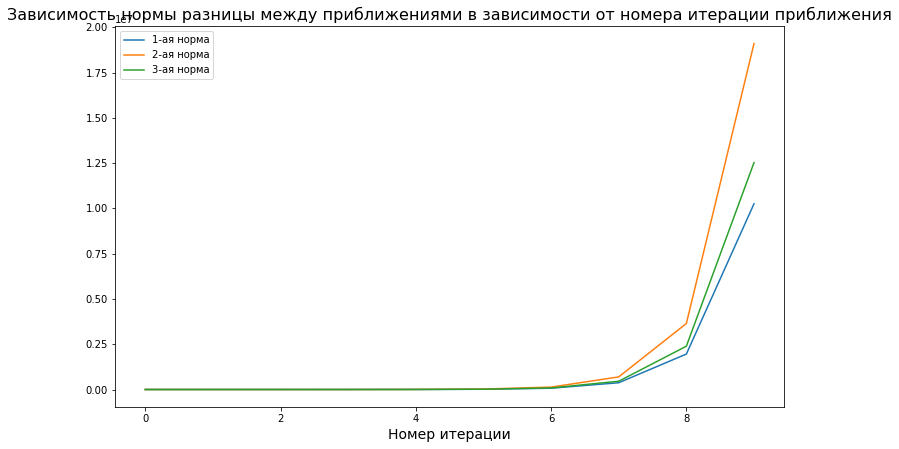

In [21]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(range(iterations)), y=norms[0], label="1-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[1], label="2-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[2], label="3-ая норма")
plt.title(
    "Зависимость нормы разницы между приближениями в зависимости от номера итерации приближения",
    fontsize=16,
)
plt.xlabel("Номер итерации", fontsize=14)
plt.show()


## Метод градиентного спуска

In [44]:
def grad_descent_iteration(A, x, b, i):
    antigrad = b - A @ x
    lr = np.sum(antigrad * antigrad) / np.sum(antigrad * (A @ antigrad)) / i
    return x + lr * antigrad


In [55]:
# если b окажется 0, то градиент полностью занулится и мы не сможем сдвинуться с места вовсе
x = np.random.rand(4).reshape(-1, 1)
norms = [[] for i in range(3)]
iterations = int(1e3)
for i in range(iterations):
    x = grad_descent_iteration(A, x, y, i + 1)
    norms[0].append(norm_1_vec(A @ x - y))
    norms[1].append(norm_2_vec(A @ x - y))
    norms[2].append(norm_3_vec(A @ x - y))


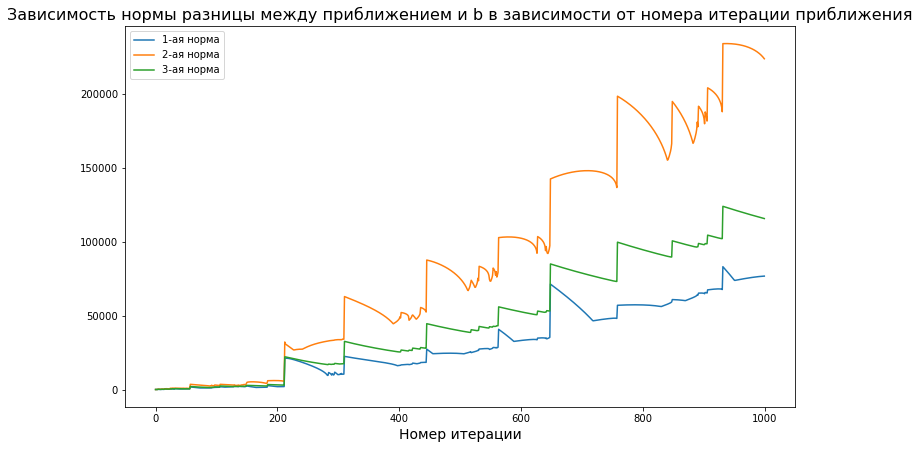

In [56]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(range(iterations)), y=norms[0], label="1-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[1], label="2-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[2], label="3-ая норма")
plt.title(
    "Зависимость нормы разницы между приближением и b в зависимости от номера итерации приближения",
    fontsize=16,
)
plt.xlabel("Номер итерации", fontsize=14)
plt.show()
